In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
import xgboost as xgb

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/nnformat/data_train_NNFormat.csv"
data = pd.read_csv(path, index_col=['timestamp'], parse_dates=['timestamp'], dayfirst=True)
data

,fact
timestamp,
2019-01-01 00:00:00,294
2019-01-01 01:00:00,292
2019-01-01 02:00:00,290
2019-01-01 03:00:00,293
2019-01-01 04:00:00,294
...,...
2019-09-08 19:00:00,253
2019-09-08 20:00:00,263
2019-09-08 21:00:00,261


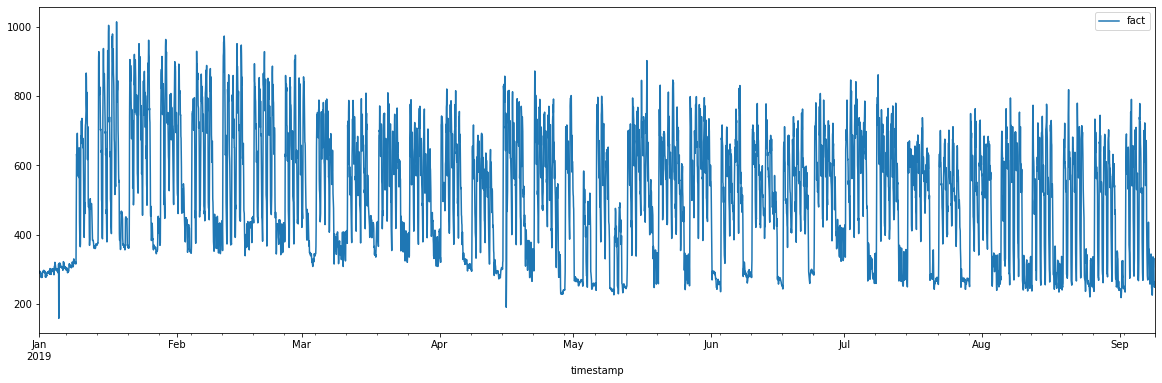

In [4]:
data.plot(figsize=(20,6))

In [5]:
print('Количество дней', 6024/24)
print('Точки для кросс валидации', (6024/24 - 14)*24, (6024/24 - 14*2)*24, (6024/24 - 14*3)*24, (6024/24 - 14*4)*24)

Количество дней 251.0
Точки для кросс валидации 5688.0 5352.0 5016.0 4680.0


In [6]:
train_1, test_1 = data[14*24:4680], data[4680:5016] # train 14.1-14.7, test 15.7-28.7
train_2, test_2 = data[14*24:5016], data[5016:5352] # train 14.1-28.7, test 29.7-11.8
train_3, test_3 = data[14*24:5352], data[5352:5688] # train 14.1-11.8, test 12.8-25.8
train_4, test_4 = data[14*24:5688], data[5688:6024] # train 14.1-25.8, test 26.8-8.9
# data 14.1-8.9, pred 9.9-22.9

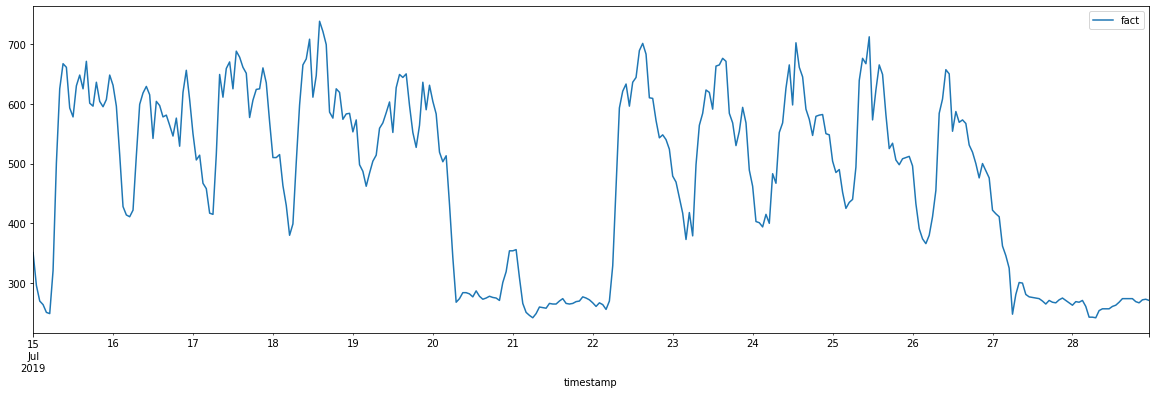

In [7]:
test_1.plot(figsize=(20,6))

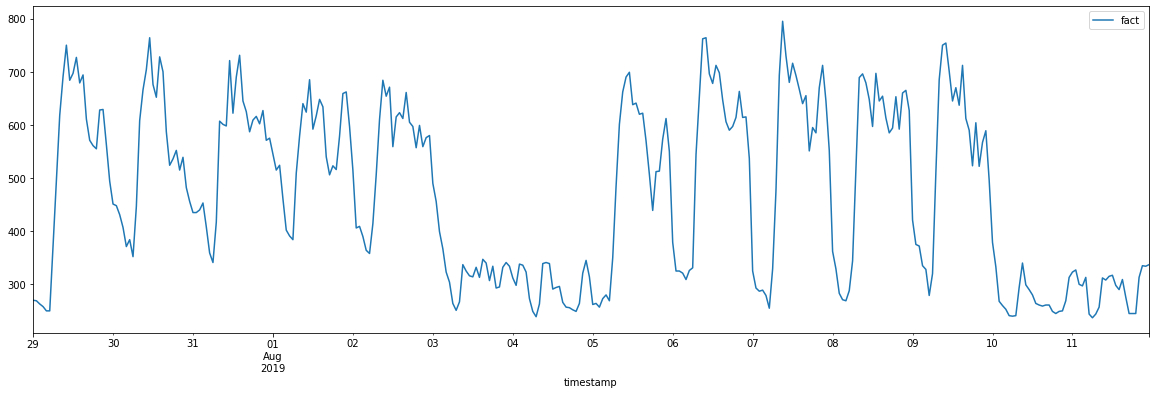

In [8]:
test_2.plot(figsize=(20,6))

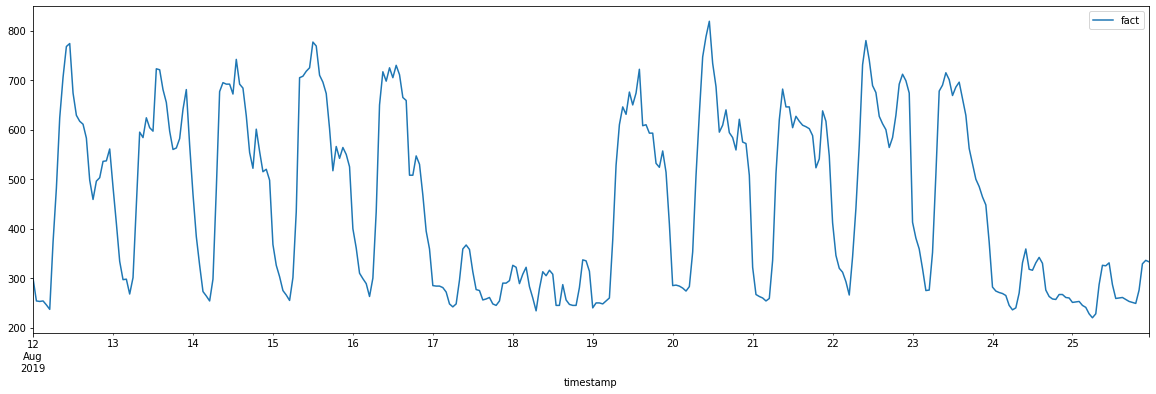

In [9]:
test_3.plot(figsize=(20,6))

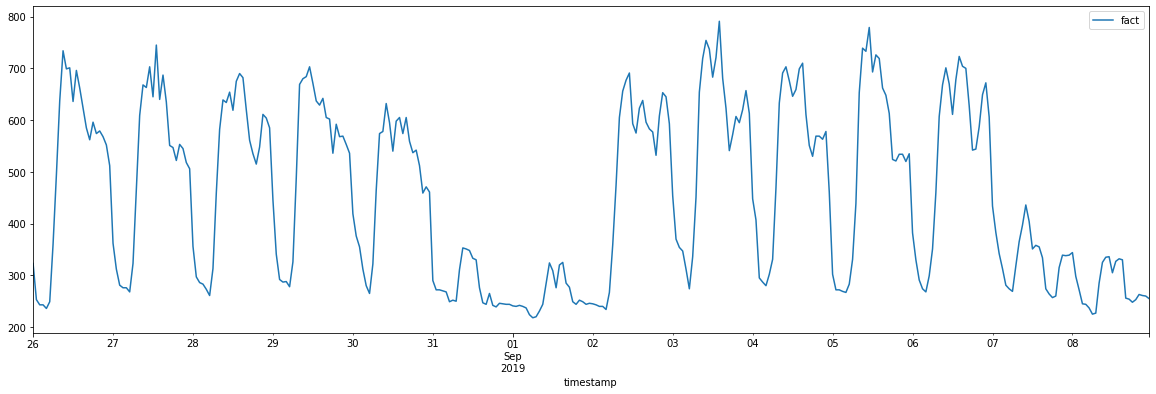

In [10]:
test_4.plot(figsize=(20,6))

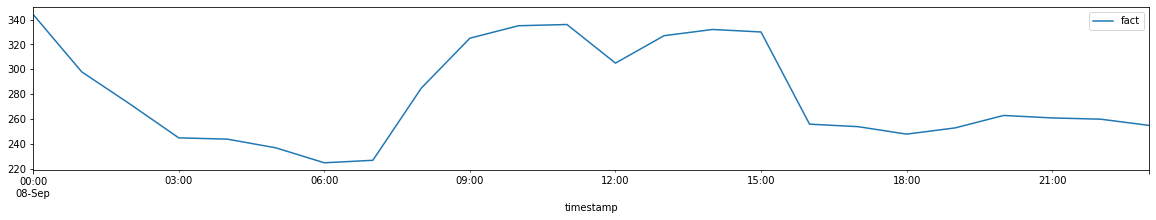

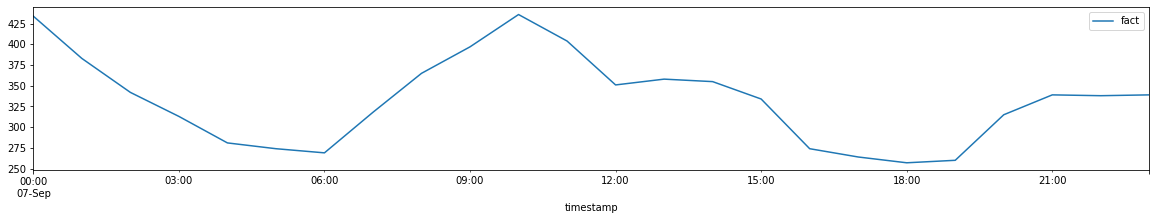

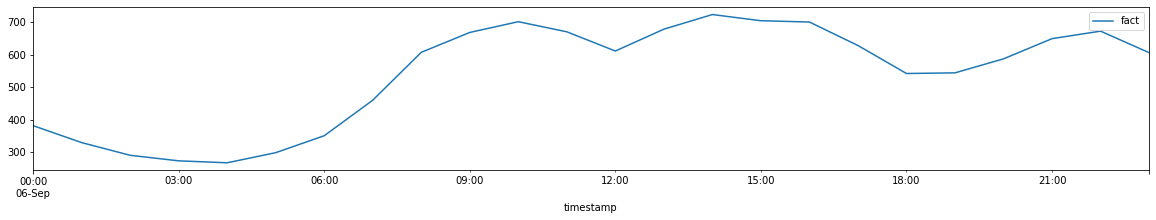

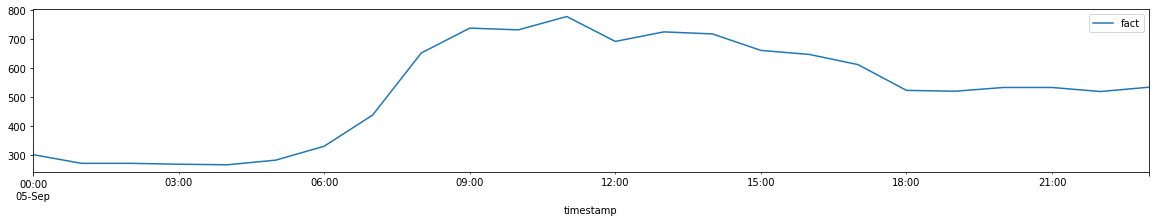

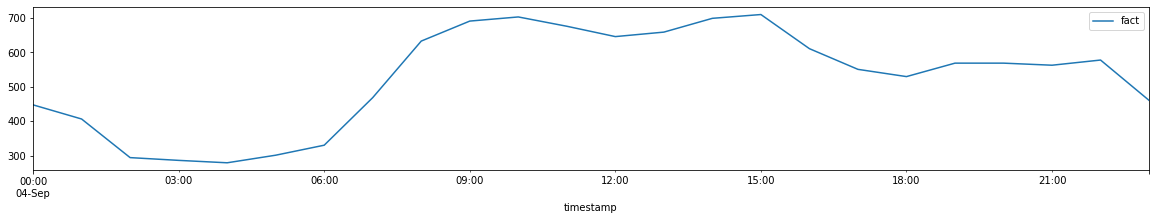

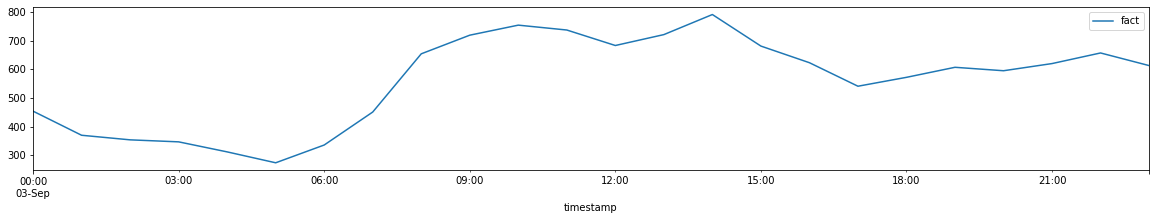

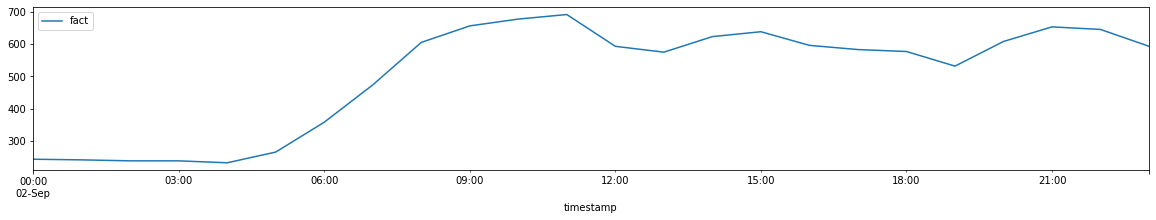

In [11]:
for i in range(7):
  data[6024-(i+1)*24:6024-i*24].plot(figsize=(20,3))

In [12]:
def holt_winster(train, test):
  model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=7*24).fit()
  pred = model.predict(start=test.index[0], end=test.index[-1])
  print('RMSE: ', math.sqrt(mse(test, pred)))
  
  train_plot = train[train.shape[0]-14*24:]

  plt.figure(figsize=(20, 6))
  plt.plot(train_plot.index, train_plot, label='Train')
  plt.plot(test.index, test, label='Test')
  plt.plot(pred.index, pred, label='Holt-Winters')
  plt.legend(loc='best')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


RMSE:  80.23395993053852


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


RMSE:  96.35219773018966


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


RMSE:  79.90438890212528


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RMSE:  68.87017163396096


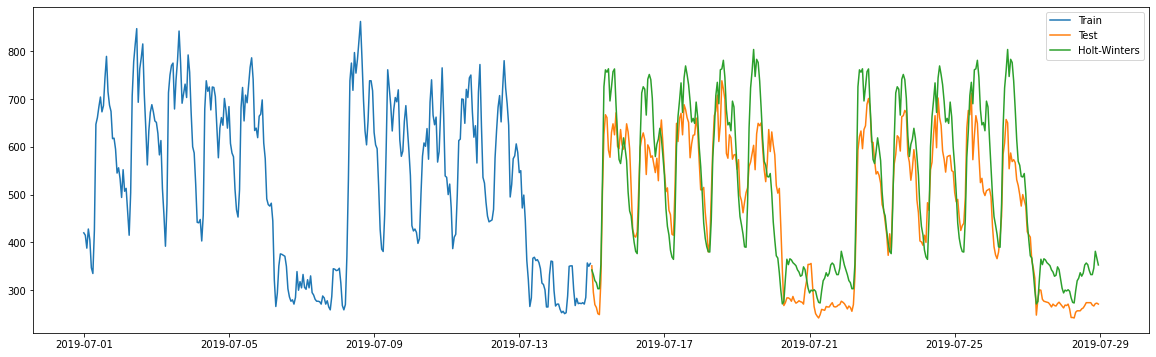

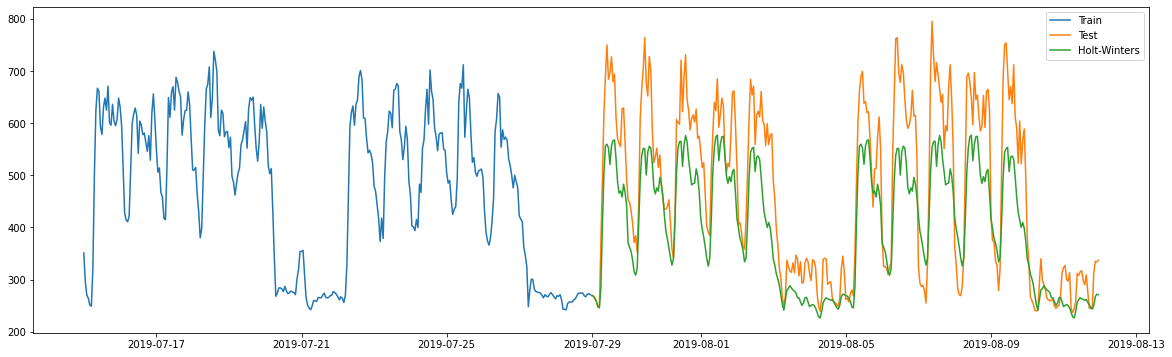

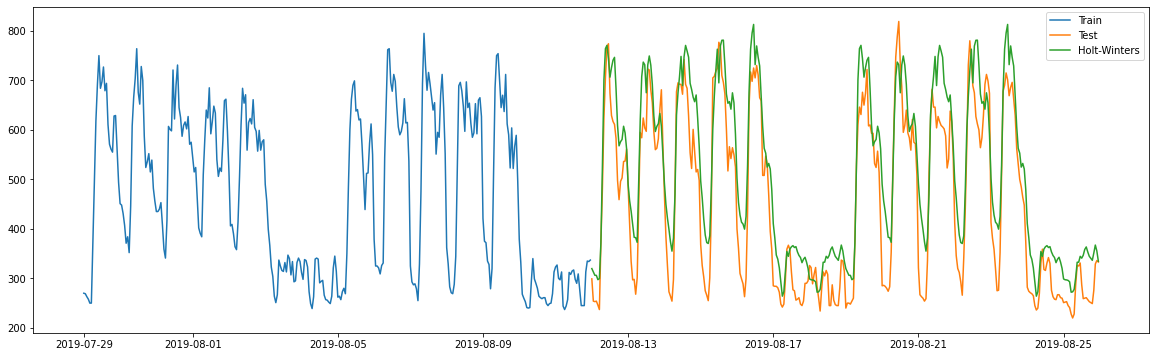

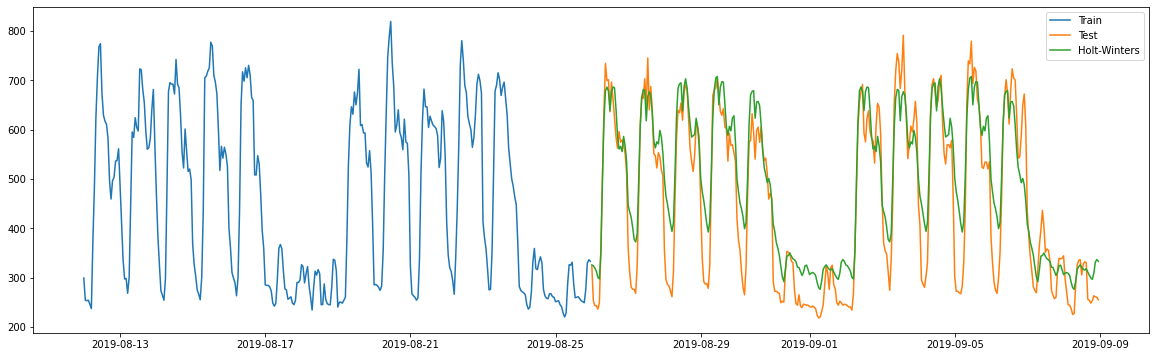

In [13]:
holt_winster(train_1, test_1)
holt_winster(train_2, test_2)
holt_winster(train_3, test_3)
holt_winster(train_4, test_4)

In [14]:
test_dates = pd.date_range(start='2019-09-09 00:00:00', end='2019-09-22 23:00:00', periods=14*24)
test_dates

DatetimeIndex(['2019-09-09 00:00:00', '2019-09-09 01:00:00',
               '2019-09-09 02:00:00', '2019-09-09 03:00:00',
               '2019-09-09 04:00:00', '2019-09-09 05:00:00',
               '2019-09-09 06:00:00', '2019-09-09 07:00:00',
               '2019-09-09 08:00:00', '2019-09-09 09:00:00',
               ...
               '2019-09-22 14:00:00', '2019-09-22 15:00:00',
               '2019-09-22 16:00:00', '2019-09-22 17:00:00',
               '2019-09-22 18:00:00', '2019-09-22 19:00:00',
               '2019-09-22 20:00:00', '2019-09-22 21:00:00',
               '2019-09-22 22:00:00', '2019-09-22 23:00:00'],
              dtype='datetime64[ns]', length=336, freq=None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


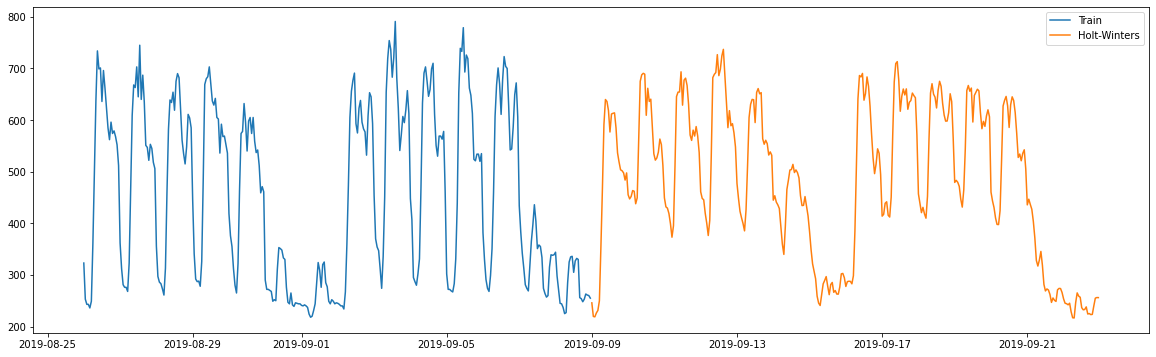

In [15]:
model = ExponentialSmoothing(data[140*24:], seasonal='mul', seasonal_periods=2*7*24).fit()
pred = model.predict(start=test_dates[0], end=test_dates[-1])
  
train_plot = data[data.shape[0]-14*24:]

plt.figure(figsize=(20, 6))
plt.plot(train_plot.index, train_plot, label='Train')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [16]:
pred.to_csv('/content/drive/MyDrive/nnformat/answer.csv')